<a href="https://colab.research.google.com/github/Ben-Judas/Customer-Churn-Analysis/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER CHURN ANALYSIS

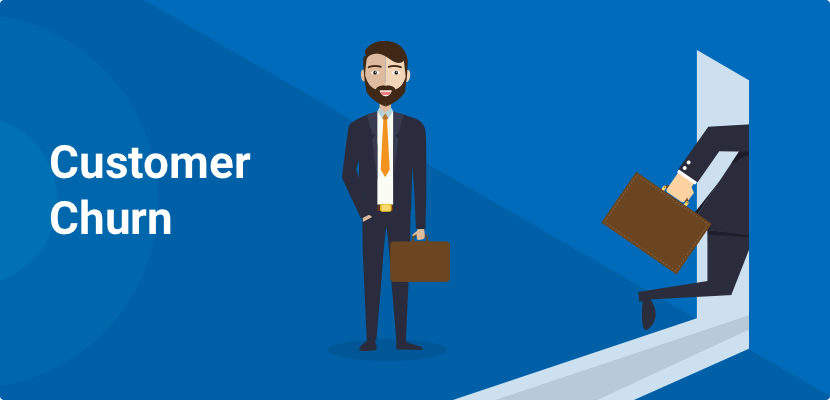

#A. TABLE OF CONTENTS

#B. INTRODUCTION

'Customer Churn’ refers to the rate at which a company loses its subscribers because customers stop doing business with them.

It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

Churn rates really matter for businesses because they are an important indicator of long term success.

This leads to loss of revenue.


# METHODOLOGY
Step 1: Business Understanding

*   Business Problem
*   Business Objective
*   Modeling Goals

Step 2: Data Understanding

*   Data Source
*   Variables

Step 3: Data Preparatio or Data Cleaning

*   Select/Get Data
*   Analyze and Transform Variables
*   Random Sampling


Step 4: Modeling

*   Model Selection and Develop Models (Training)
*   Validate and Optimize Models  (Testing)

Step 5: Evaluation

Step 6: Data Presentation

Step 7: Documentation

##### Data Modelling Process
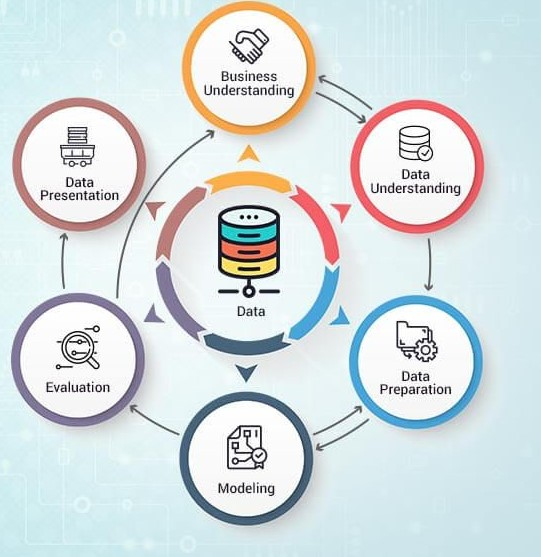

# STEP 1. BUSINESS UNDERSTANDING

## 1.1. Business Problem

TELCO is a companie specialized in mobile telecommunications who provides a full range of products and services, including wireless network, internet, TV, cell phone Some.

This leading telecom company has a massive market share but one big problem: 

several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers. Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. 

The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.

The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They have a dataset of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.The data also offers demographic data and data on the services that each customer purchases.Finally there is information on the payments those customers make.
    

## 1.2. Business Objectives

What product features will cause customers to leave ?

How to use the findings from the data to help the company retain customers ?

## 1.3. Deliverables

       1.  A clear summary of the business task
       2.  A Documentation of any cleaning or manipulation of data
       3.  A summary of analysis
       4.  Supporting visualizations and key findings
       5.  Recommendations based on the analysis

### 1.3.1. FAQ

Tell a story to the marketing team to help them understand the customerswho churn and what the marketing team can do to prevent it. Highlight the information with helpful visualizations.

    1.How much is churn affecting the business? How big is churn compared to the existingcustomer base?

    2.Explain churn by the below categories. Are there any factors that combine to be especially impactful
    
        a. Customer demographics like age and gender
        b. Services used
        c. Billing information

    3.What services are typically purchased by     customerswho churned? Are any services 
    especially helpful in retaining customers?

    4.Bonus!How long will it take for the company to lose all its customers?  Which demographics will they lose first?

### 1.3.2. FAQ

Add to your presentation from Week 1. Create analyses that answer the following questions:

      1. Are there types of people who churn at higher rates? Come up with 2-3 profiles to give executives an idea of who churns often. Try to look several factors deep for example: people with no internet service and no phone service, or women who are senior citizens See FAQ for details.

      2. Do you have any recommendations on how to reach groups of people who churn at high rates?

      3. Create a case study for one of your customer profiles. Show how much additional revenue you could make by increasing sales by 10% in that profile.

      4. Bonus! Use a clustering algorithm like K-Means to break customers into groups.
          a. How many groups did you build and how did you decide on that number of groups?

          b. How does churn vary by group?
          c. How is this similar or different to your analysis without using Machine Learning 
    

### 1.3.3. FAQ

      1. What is a customer profile ? 
      2. It’s a device used to tell a story about customers by providing an example of what a typical customer is.

      A commonly used visualization for a customer profile is a radar chart, but feel free to create your own.

## 1.3. Modelling Goals
My work is to :

    1. Help them identify the types of customers who churn

    2. Predict who of their current customers will churn next month.

#STEP 2. DATA UNDERSTANDING



*   Data Sources

*   Variable

CustomerID: Customer ID unique for each customer


gender: Whether the customer is a male or a female


SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)


Partner: Whether the customer has a partner or not (Yes, No)


Dependent: Whether the customer has dependents or not (Yes, No)


PhoneService: Whether the customer has a phone service or not (Yes, No)


MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)


InternetService: Customer’s internet service provider (DSL, Fiber optic, No)


OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)


OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)


DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)


TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)


StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)


StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)


Contract: The contract term of the customer (Month-to-month, One year, Two years)


PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)


PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

Prediction feature:

Churn: Whether the customer move out or not (Yes or No)

Features are subdivided into:

* Customer information

gender , SeniorCitizen , Partner , Dependents

* Services customer

Services that each customer has signed up for:

PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies

* Customer account information:

tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

#C. EXPLORATORY DATA ANALYSIS (EDA)





## 2.1. Packages

In [1774]:
# Packages for data manipulation

import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Statistics packages 
import scipy.stats as stats

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')


## 2.2. Functions

In [1775]:
def grab_cols(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns  # Categorical
                if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns
                   if dataframe[col].nunique() < cat_th and  # Numeric but categorical
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns
                   if dataframe[col].nunique() > car_th and  # Categorical but high cardinal
                   dataframe[col].dtypes == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes not in ['O', 'datetime64[ns]'] and
                dataframe[col].nunique() > 10]  # Numeric
    return cat_cols, num_but_cat, cat_but_car, num_cols


    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of rows: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print(df.columns.tolist())
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())


     # Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)


def custo(x):

      """
    This function is created in order to make univariate analysis
    It creates barplot to show distribution of customer from a frequencies table

      """
    # Frequences table
      custo = pd.DataFrame(df.groupby(x)[['customerID']].count())

      ax1 = plt.figure(figsize=(10,8))
      plt.bar(custo.index, custo['customerID'] ,color = ['coral','grey','red'], edgecolor="black")
      plt.title('Distribution of customers by '+ x,size=12)

    # Show the proportions
      for i in range(len(custo['customerID'])):
        plt.text(i,0.1, str(round(custo['customerID'].values[i]/df.shape[0], 2))+"%", fontsize =12, horizontalalignment='center', verticalalignment='baseline')
    
    #Save the graph
      plt.savefig('Distribution of customers by '+ x + ".png")
      return custo

## 2.3. Data acquisition

In [1776]:
# import and read the file from a local host
df = pd.read_csv("Telco-Customer-Churn.csv")

## 2.4. Data Reading

In [1777]:
# display fisrt five rows and the shape of the dataset
display(df.head())
display(df.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)

# STEP 3. DATA CLEANING

In [1778]:
# display the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1779]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [1780]:
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
                    ... 
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
Length: 21, dtype: int64


In [1781]:
# Check for duplicated columns
df[df.duplicated()].sum()

customerID         0.00
gender             0.00
SeniorCitizen      0.00
Partner            0.00
Dependents         0.00
                   ... 
PaperlessBilling   0.00
PaymentMethod      0.00
MonthlyCharges     0.00
TotalCharges       0.00
Churn              0.00
Length: 21, dtype: float64

In [1782]:
# Check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
                   ..
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Length: 21, dtype: int64

## 3.0. Analyze
* We have more than 7,000 customer's dataset

* 21 features

* There is no duplicated columns

* There is no null values

* There is no missing values



In [1783]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

In [1784]:
Partner = df.groupby(by=['Churn','gender','Partner']).size().to_frame()
Partner.columns = ['Total']
Partner['%'] = Partner/df.shape[0]*100
Partner

Total     %
Churn gender Partner             
No    Female No        1180 16.75
             Yes       1369 19.44
      Male   No        1261 17.90
             Yes       1364 19.37
Yes   Female No         620  8.80
             Yes        319  4.53
      Male   No         580  8.24
             Yes        350  4.97

In [1785]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1786]:
df_a = df.query('(PhoneService == "Yes") and (MultipleLines == "Yes")')
#Part = df_a.groupby(by=['Churn']).size().to_frame()
Part = round(df_a['SeniorCitizen'].value_counts(normalize=True)*100,2)
Part = Part.reset_index()
#Part['%'] = Part/df_a.shape[0]*100
Part

,index,SeniorCitizen
0,0,77.62
1,1,22.38


In [1787]:
#Partner = df.groupby(by=['Churn','gender', 'PhoneService']).size().to_frame()
Partner = round(df_a['SeniorCitizen'].value_counts(normalize=True)*100,2)
Partner.columns = ['Total']
Partner['%'] = Partner/df.shape[0]*100
Partner

0                                                77.62
1                                                22.38
%    0   1.10
1   0.32
Name: SeniorCitizen, dtype: ...
Name: SeniorCitizen, dtype: object

In [1788]:
pie_plot(df["Partner"].value_counts(), plot_title="Partner Churn Distribution")

##3.1. Data Checking

In [1789]:
# columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1790]:
# replace (1,0) by (Yes or No) in SeniorCitizen column 
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,"Yes")
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,"No")
# Transforming TotalCharges data type into numeric
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors = "coerce")
# df.drop('customerID', axis = 1, inplace= True)

In [1791]:
def grab_cols(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns  # Categorical
                if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns
                   if dataframe[col].nunique() < cat_th and  # Numeric but categorical
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns
                   if dataframe[col].nunique() > car_th and  # Categorical but high cardinal
                   dataframe[col].dtypes == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes not in ['O', 'datetime64[ns]'] and
                dataframe[col].nunique() > 10]  # Numeric
    return cat_cols, num_but_cat, cat_but_car, num_cols

In [1792]:
cat_cols, num_but_cat, cat_but_car, num_cols = grab_cols(df)

In [1793]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [1794]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [1795]:
# verify there are no duplicated values
# df.customerID.nunique()

In [1796]:
# count unique column values
#for col in df.columns:
  #print(f"{col} = {df[col].nunique()}")

In [1797]:
# display values of tenure columns
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [1798]:
# categorical function for tenure columns
def tenure_cat(x, errors = "coerce"):
  if x <= 12:
    return '-12 month'
  if 13 < x <= 24:
    return '13-24 month'
  if 25 < x <= 36:
    return '25-36 month'
  if 37 < x <= 48:
    return '37-48 month'
  if x > 48:
    return '+48 month'

In [1799]:
# apply the tenure function
df['ten_group']=df['tenure'].apply(tenure_cat)
df['ten_group'].head()

0      -12 month
1    25-36 month
2      -12 month
3    37-48 month
4      -12 month
Name: ten_group, dtype: object

In [1800]:
for col in df.iloc[:,1:].columns:
  if df[col].dtype == "object":
    df[col] = df[col].astype('category')


In [1801]:
# phone service, internet service, online security, online backup, deviceprotection,
#tech support, streaming tv, streming movies, contract, monthly charge, total charge
# papeerless billing, monthly charges, total charges.

In [1802]:
# make changes in some columns

df["PhoneService"] = df["PhoneService"].replace({1:'Yes', 0:'No'})
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:'Yes', 0:'No'})

In [1803]:
# count column values
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6530
Churn = 2
ten_group = 5


In [1804]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ten_group'],
      dtype='object')

In [1805]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,-12 month
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36 month
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-12 month
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 month
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,-12 month


## 3.2. Descriptive Analysis

In [1806]:
''' Subset of the dataset'''

# Creating list utilities...
cosservice = ['customerID', 'TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','PhoneService', 'MultipleLines','StreamingTV', 'StreamingMovies', 'Churn', 'InternetService'] 
customerchar=['customerID', 'SeniorCitizen','gender', 'Partner', 'Dependents','Churn']
billingcharges=['customerID','MonthlyCharges','TotalCharges', 'tenure', 'ten_group','PaymentMethod', 'Contract', 'Churn']

# Creating list utilities...
service = ['TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','PhoneService', 'MultipleLines',
          'StreamingTV', 'StreamingMovies', "InternetService"]
customer=['SeniorCitizen','gender', 'Partner', 'Dependents']
billing=['MonthlyCharges','TotalCharges', 'ten_group','PaymentMethod', 'Contract','tenure']

In [1807]:
df.describe(include=[np.number])

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7032.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2266.77
min,0.00,18.25,18.80
25%,9.00,35.50,401.45
50%,29.00,70.35,1397.47
75%,55.00,89.85,3794.74
max,72.00,118.75,8684.80


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dd98b6850>,
      dtype=object)

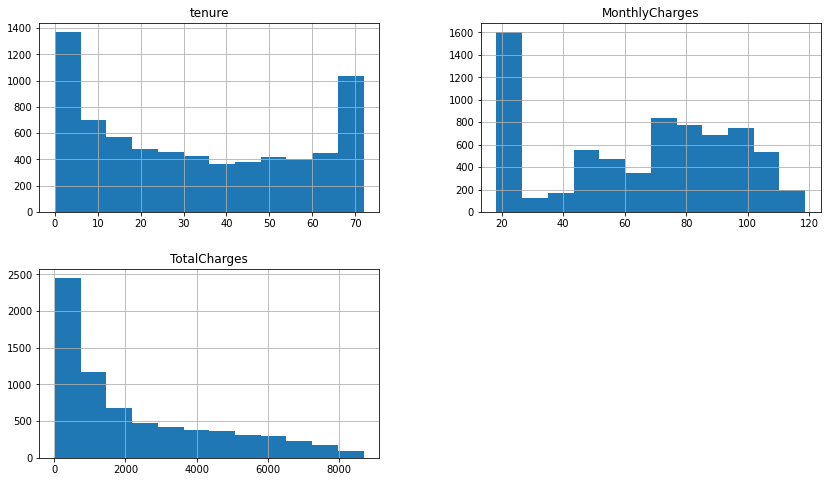

In [1808]:
df[num_cols].hist(figsize = (14,8), bins=12)

In [1809]:
data = df.describe(include=['category']).T
data['%'] = data['freq']/data['count']*100
data

,count,unique,top,freq,%
gender,7043,2,Male,3555,50.48
SeniorCitizen,7043,2,No,5901,83.79
Partner,7043,2,No,3641,51.70
Dependents,7043,2,No,4933,70.04
PhoneService,7043,2,Yes,6361,90.32
MultipleLines,7043,3,No,3390,48.13
InternetService,7043,3,Fiber optic,3096,43.96
OnlineSecurity,7043,3,No,3498,49.67
OnlineBackup,7043,3,No,3088,43.84
DeviceProtection,7043,3,No,3095,43.94


In [1810]:
# Particular case: Histogram subplot (1, 2)
def histogram_subplot(dataset_a, dataset_b, feature_a: str,
                        feature_b: str, title: str, title_a: str, title_b: str):
    fig = make_subplots(rows=1, cols=2, subplot_titles=(
                        title_a,
                        title_b
                        )
                    )
    fig.add_trace(go.Histogram(x=dataset_a[feature_a], showlegend=False), row=1, col=1)
    fig.add_trace(go.Histogram(x=dataset_b[feature_b], showlegend=False), row=1, col=2)
    fig.update_layout(template="simple_white")
    fig.update_layout(autosize=False,
                        title={"text" : title,
                        "y" : 0.9,
                        "x" : 0.5,
                        "xanchor" : "center",
                        "yanchor" : "top"},  
                        yaxis={"title" : "<i>Frequency</i>"})
    fig.update_traces(marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)
    iplot(fig)

In [1811]:
df_aux = df.query('(Contract == "Month-to-month") and (Churn == "Yes")')
histogram_subplot(df_aux, df_aux, "MonthlyCharges", "TotalCharges", "<b>Charges Distribution for Month-to-month contracts for Churned Clients</b>",
                "(a) Monthtly Charges Distribution", "(b) Total Charges Distribution")

In [1812]:
df_aux = df.query('(Contract == "Month-to-month") and (Churn == "No")')
histogram_subplot(df_aux, df_aux, "MonthlyCharges", "TotalCharges", "<b>Charges Distribution for Month-to-month contracts for No Churned Clients</b>",
                "(a) Monthtly Charges Distribution", "(b) Total Charges Distribution")

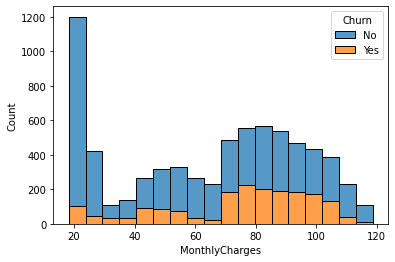

In [1813]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", multiple="stack")

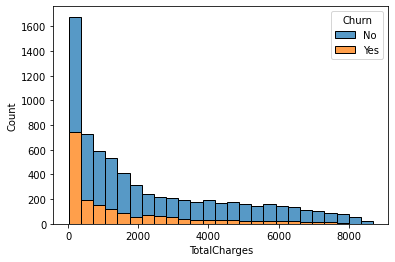

In [1814]:
sns.histplot(data=df, x="TotalCharges", hue="Churn", multiple="stack")

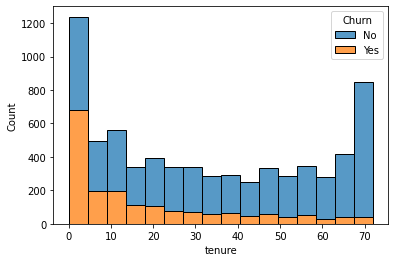

In [1815]:
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack")

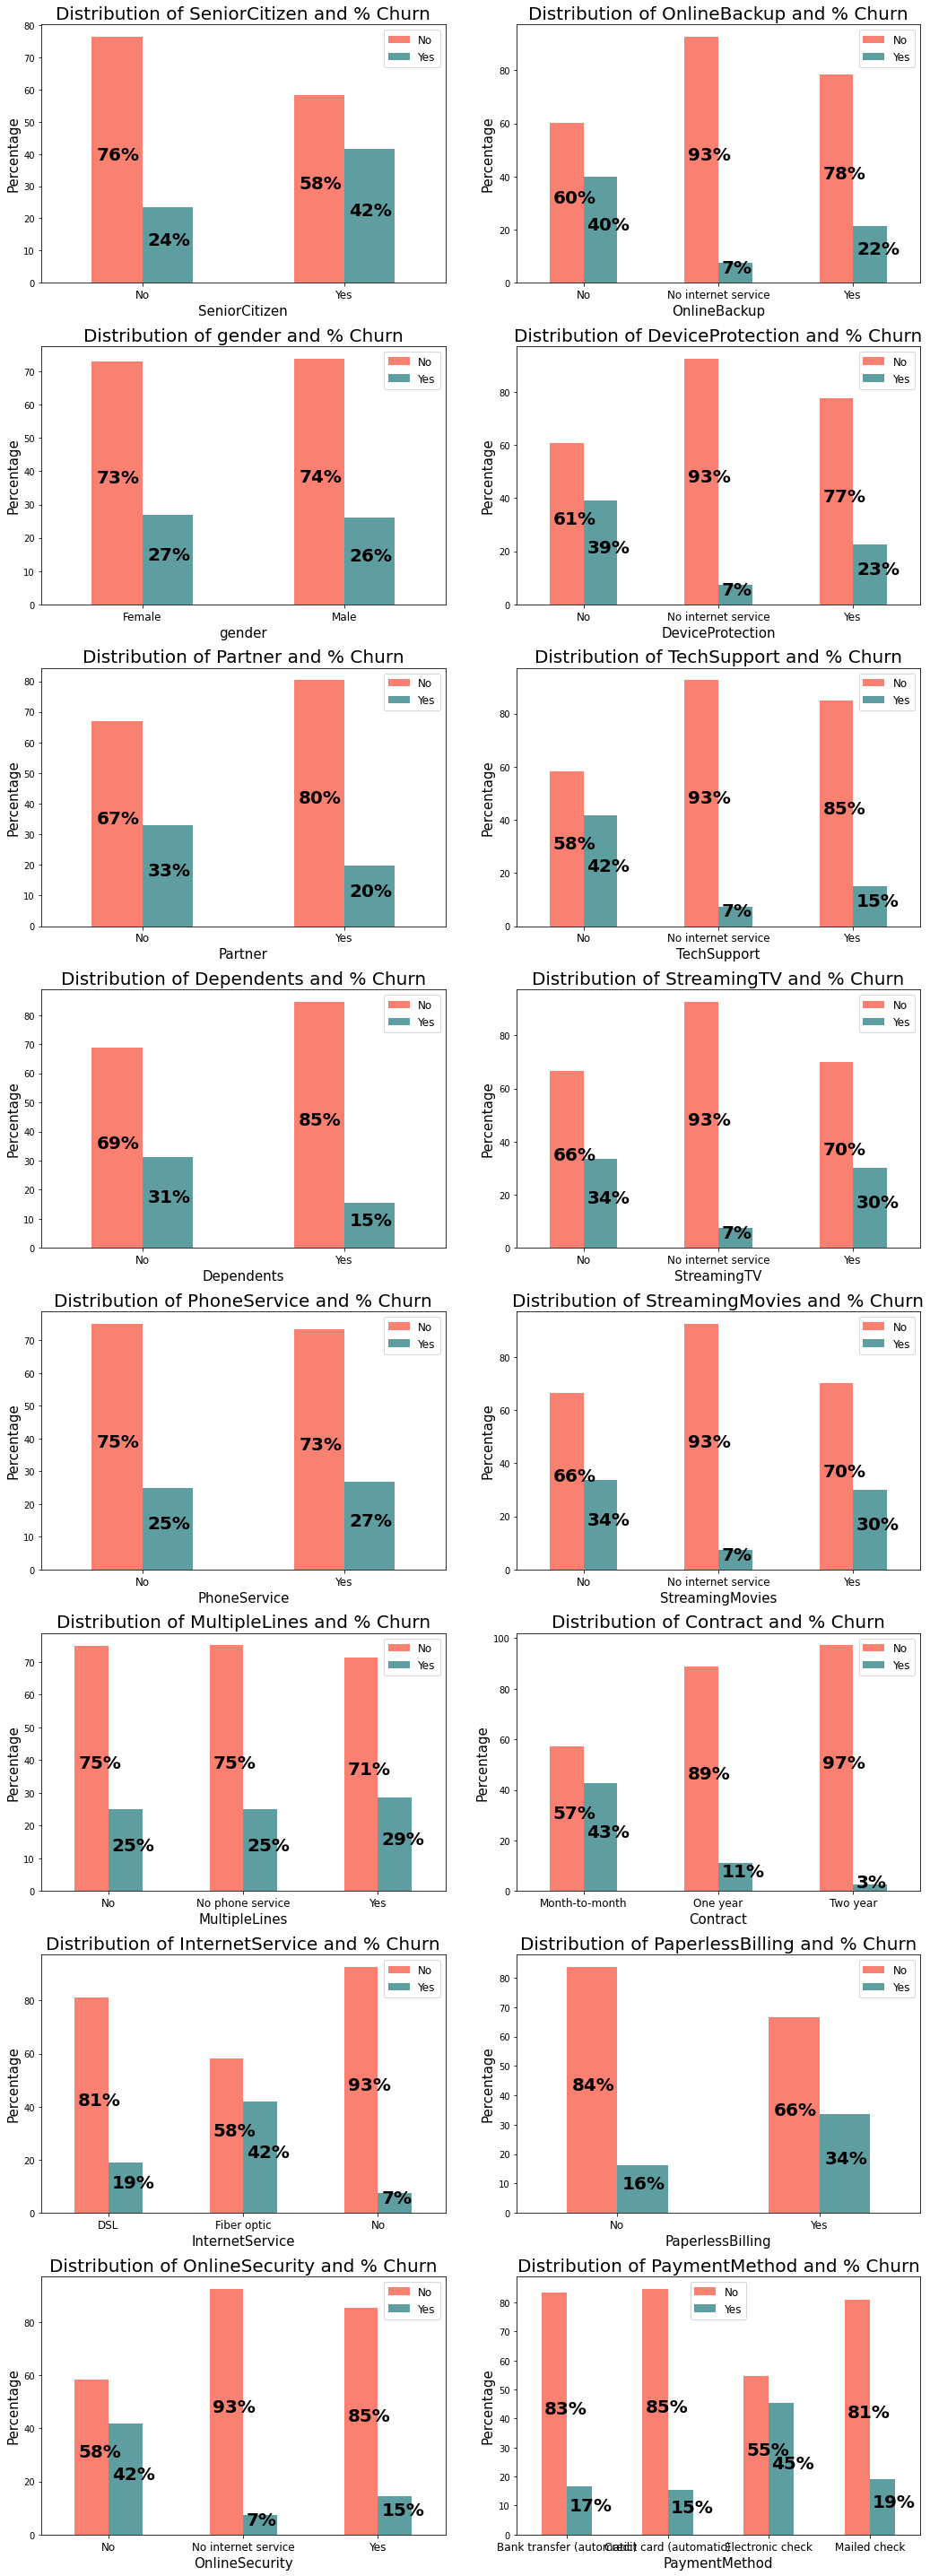

In [1816]:
trans_df = df.iloc[:,1:21]
#data["Churn"].replace(to_replace = "Yes", value = 1, inplace =True)
#data["Churn"].replace(to_replace = "No", value = 0, inplace = True)

#draw bar plot
cate_cols = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 8,ncols = 2,figsize = (15,40))

for i,feature in enumerate(cate_cols):
    if i < 8:
        ax = trans_df.groupby([feature,'Churn']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >=8 and i < 16:
        ax = trans_df.groupby([feature,'Churn']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-8,1])
    
    ax.set_title("Distribution of {} and % Churn".format(feature), fontsize = 20)
    ax.set_ylabel("Percentage", fontsize=15)
    ax.set_xlabel("{}".format(feature), fontsize=15)
    ax.legend(["No", "Yes"], fontsize=12)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [1817]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}), 
          end='\n\n\n')

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(col_name)
        plt.xticks(rotation = 45)
        plt.show()

In [1818]:
# group Churn by Customer 
Churn = df.groupby(by=['Churn'])['customerID'].size().to_frame()
# add a Total column
Churn.columns = ['Total']
# add % column
Churn['%'] = Churn/df.shape[0]
# display column
Churn

,Total,%
Churn,,
No,5174,0.73
Yes,1869,0.27


In [1819]:
pie_plot(df["Churn"].value_counts(), plot_title="Customer Churn Distribution")

### 3.2.1. Descriptive Analysis of Services

In [1820]:
def monthly(x):
    """
    This function is created in order to make univariate analysis
    It creates barplot to show distribution of customer from a frequencies table

    """
    # Frequences table
    monthly = pd.DataFrame(df.groupby('TotalCharges')[[x]].sum())

    ax1 = plt.figure(figsize=(10,8))
    plt.bar(monthly.index, monthly['TotalCharges'] ,color = ['coral','grey','red'], edgecolor="black")
    plt.title('Distribution of customers by '+ x,size=12)

    # Show the proportions
    for i in range(len(monthly['TotalCharges'])):
       plt.text(i,0.1, str(round(monthly['TotalCharges'].values[i]/df.shape[0], 2))+"%", fontsize =12, horizontalalignment='center', verticalalignment='baseline')
    
    #Save the graph
    plt.savefig('Distribution of customers by '+ x + ".png")
    return monthly

,customerID
SeniorCitizen,
No,5901
Yes,1142


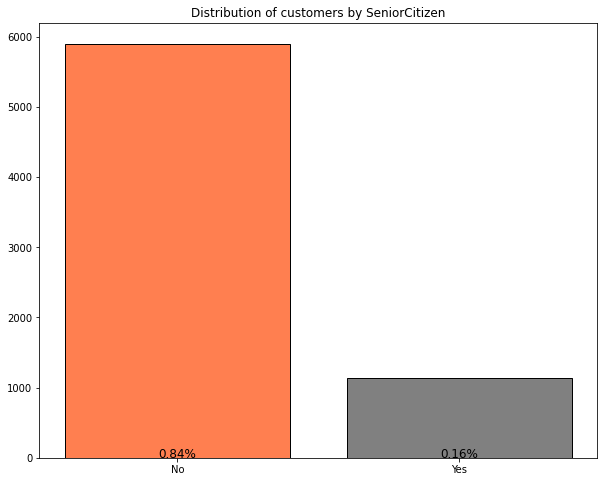

In [1821]:
custo('SeniorCitizen')

,customerID
StreamingMovies,
No,2785
No internet service,1526
Yes,2732


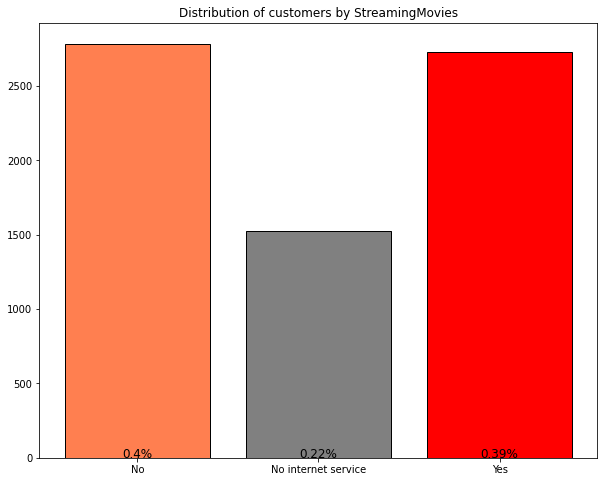

In [1822]:
custo('StreamingMovies')

,customerID
TechSupport,
No,3473
No internet service,1526
Yes,2044


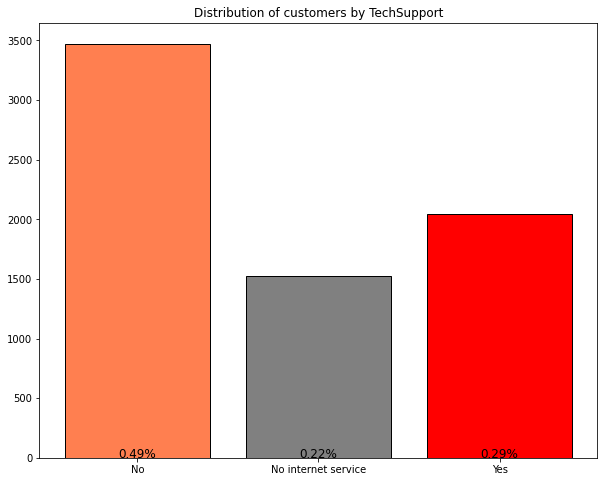

In [1823]:
custo('TechSupport')

,customerID
OnlineSecurity,
No,3498
No internet service,1526
Yes,2019


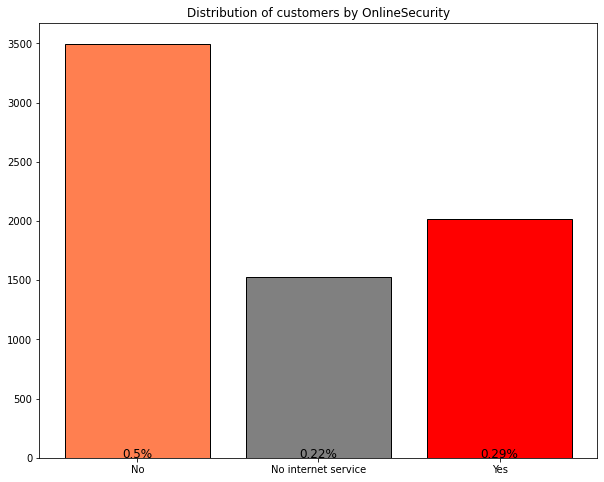

In [1824]:
custo('OnlineSecurity')

,customerID
MultipleLines,
No,3390
No phone service,682
Yes,2971


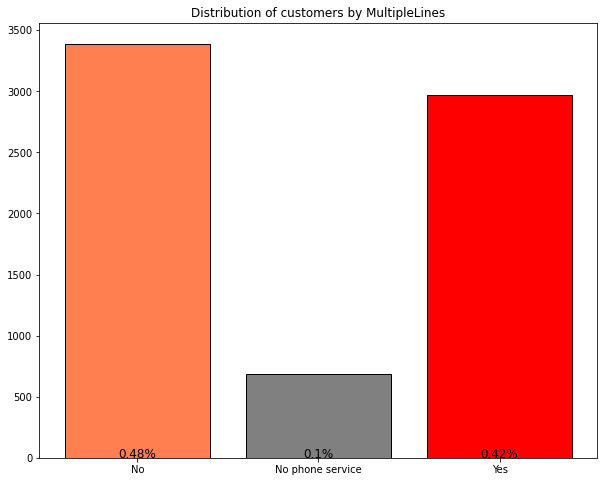

In [1825]:
custo( 'MultipleLines')

,customerID
PhoneService,
No,682
Yes,6361


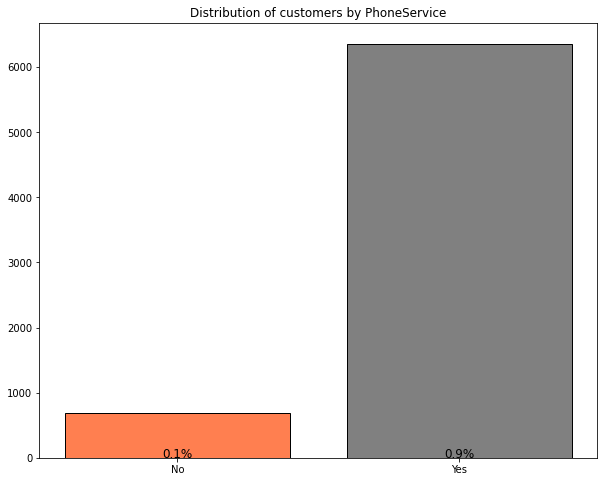

In [1826]:
custo('PhoneService')

,customerID
OnlineBackup,
No,3088
No internet service,1526
Yes,2429


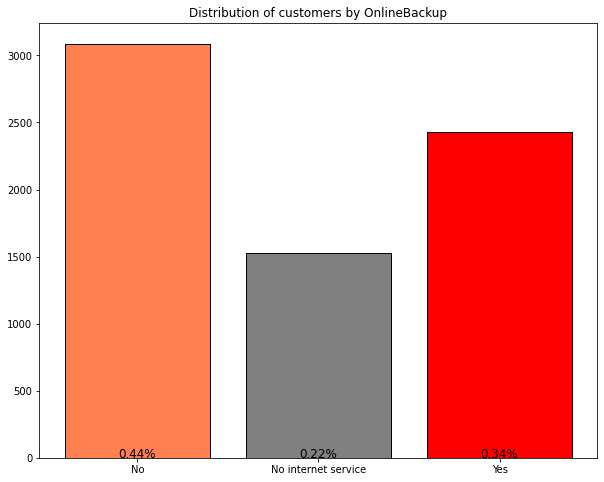

In [1827]:
custo('OnlineBackup')

,customerID
DeviceProtection,
No,3095
No internet service,1526
Yes,2422


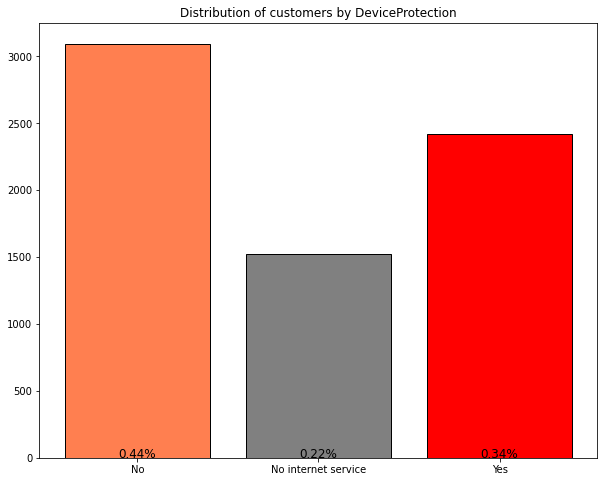

In [1828]:
custo('DeviceProtection')

### 3.2.2. Descriptive Analysis of Customer's characteristics

,customerID
gender,
Female,3488
Male,3555


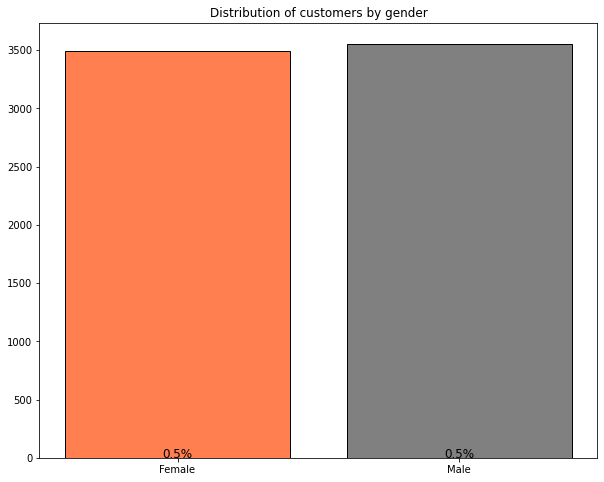

In [1829]:
custo('gender')


,customerID
SeniorCitizen,
No,5901
Yes,1142


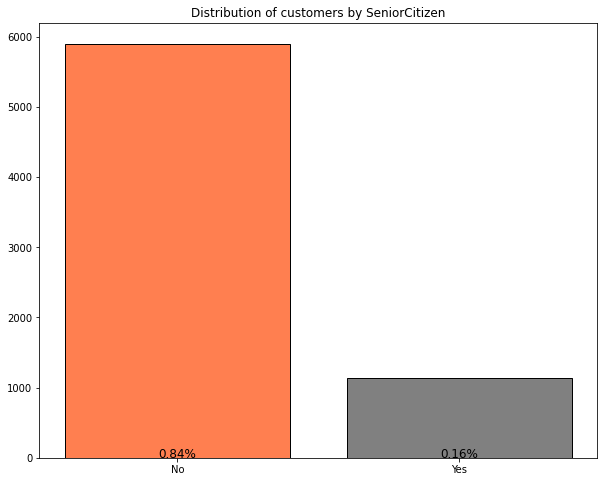

In [1830]:
custo('SeniorCitizen')

,customerID
Contract,
Month-to-month,3875
One year,1473
Two year,1695


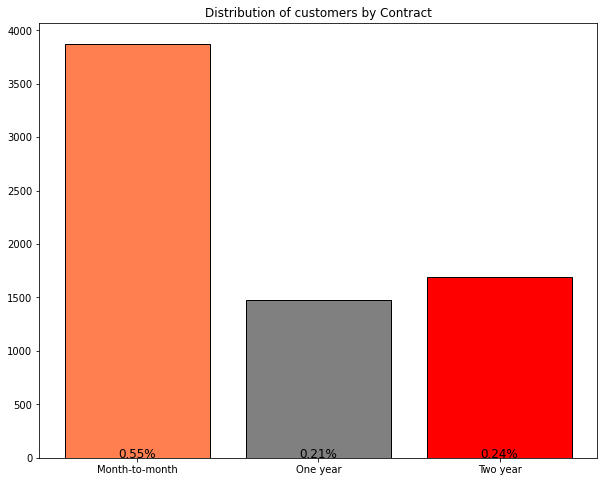

In [1831]:
custo('Contract')

,customerID
PaymentMethod,
Bank transfer (automatic),1544
Credit card (automatic),1522
Electronic check,2365
Mailed check,1612


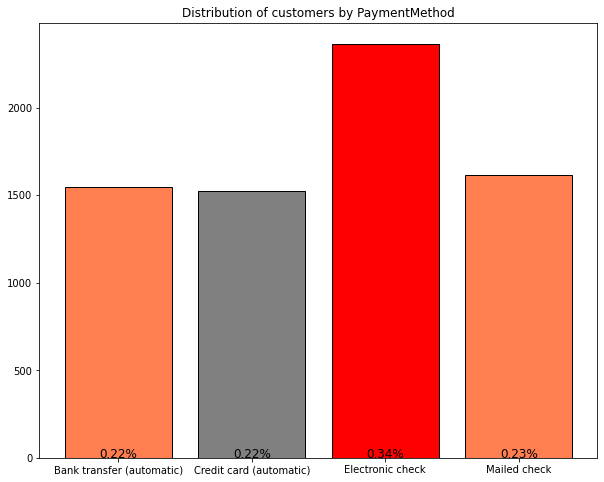

In [1832]:
custo('PaymentMethod')

,customerID
ten_group,
+48 month,2239
-12 month,2186
13-24 month,915
25-36 month,753
37-48 month,697


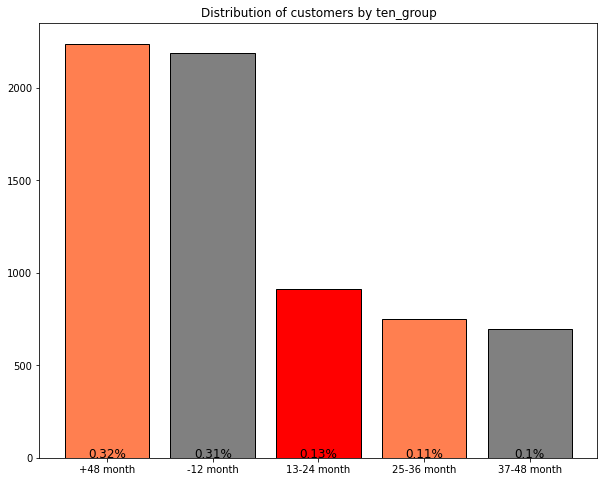

In [1833]:
custo('ten_group')

,customerID
Partner,
No,3641
Yes,3402


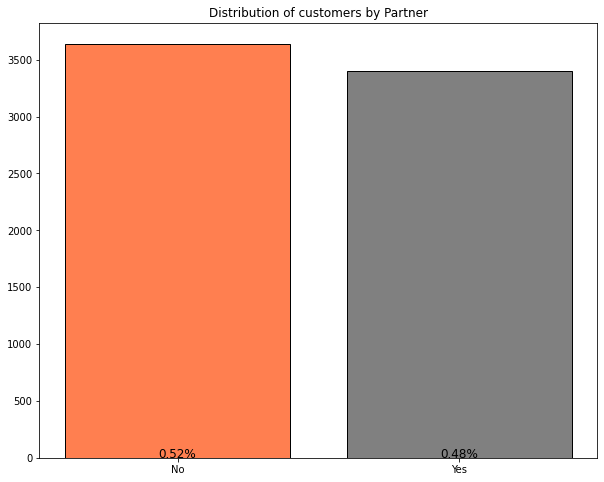

In [1834]:
custo('Partner')

,customerID
Dependents,
No,4933
Yes,2110


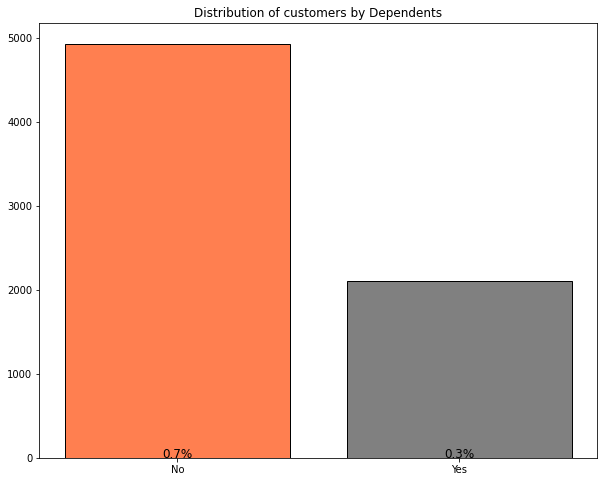

In [1835]:
custo('Dependents')

In [1836]:
# df[df['tenure'] == 0].count()

### 3.2.2. Descriptive Analysis of billing charges

# 1. BIVARIATE ANALYSIS

## 1.1. How much is churn affecting the business

In [1837]:
#Table with total and monthly charges calculated for customer that move out and those who dont

churnbill=df[billingcharges].groupby(['Churn']).sum('MonthlyCharges').reset_index()
display(churnbill)

,Churn,MonthlyCharges,TotalCharges,tenure
0,No,316985.75,13193241.80,194387
1,Yes,139130.85,2862926.90,33603


In [1838]:
round(churnbill.at[0, 'TotalCharges'],2)

13193241.8

## 1.2. How much is churn affecting customer base  

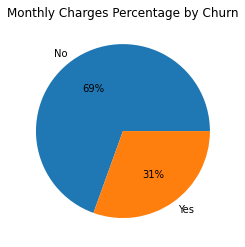

In [1839]:
#Pie chart for monthly charges 

plt.pie(churnbill['MonthlyCharges'], labels=churnbill['Churn'], autopct='%.0f%%')
plt.title("Monthly Charges Percentage by Churn")
plt.savefig("Monthly Charges Percentage by Churn.png")
plt.show()

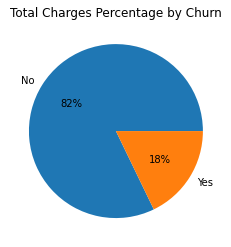

In [1840]:
#Pie for total charge

plt.pie(churnbill['TotalCharges'], labels=churnbill.Churn, autopct='%.0f%%')
plt.title("Total Charges Percentage by Churn")
plt.savefig("Total Charges Percentage by Churn.png")
plt.show()

In [1841]:
# create a df for the customer who move out
cond=df['Churn']=='Yes'
Yes = df[cond]
Yes.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group
7021,1699-HPSBG,Male,No,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,-12 month
7026,8775-CEBBJ,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,-12 month
7032,6894-LFHLY,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,-12 month
7034,0639-TSIQW,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,+48 month
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,-12 month


## 1.3. How big is churn compared to the existing customer base

In [1842]:

def pivo(x):

  """ This function allow us to do a Pivot Table by customer caracteristics
  the caracteristics is stored in the parameter x.
  """
  Yes=df[df['Churn']=='Yes']
  new_pivot=pd.pivot_table(Yes, values='customerID', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='count')
  new_pivot=new_pivot.fillna(0)
  return new_pivot

In [1843]:
for col in customer:
  print(f'\n\nChurner Distribution by {col}')
  display(pivo(col).T/Yes.shape[0]*100)



Churner Distribution by SeniorCitizen


Churn,Yes
SeniorCitizen,
No,74.53
Yes,25.47




Churner Distribution by gender


Churn,Yes
gender,
Female,50.24
Male,49.76




Churner Distribution by Partner


Churn,Yes
Partner,
No,64.21
Yes,35.79




Churner Distribution by Dependents


Churn,Yes
Dependents,
No,82.56
Yes,17.44


In [1844]:
for col in service:
  print(f'\n\nChurner Distribution by {col}')
  display(pivo(col).T/Yes.shape[0]*100)



Churner Distribution by TechSupport


Churn,Yes
TechSupport,
No,77.37
No internet service,6.05
Yes,16.59




Churner Distribution by OnlineSecurity


Churn,Yes
OnlineSecurity,
No,78.17
No internet service,6.05
Yes,15.78




Churner Distribution by OnlineBackup


Churn,Yes
OnlineBackup,
No,65.97
No internet service,6.05
Yes,27.98




Churner Distribution by DeviceProtection


Churn,Yes
DeviceProtection,
No,64.79
No internet service,6.05
Yes,29.16




Churner Distribution by PhoneService


Churn,Yes
PhoneService,
No,9.10
Yes,90.90




Churner Distribution by MultipleLines


Churn,Yes
MultipleLines,
No,45.43
No phone service,9.10
Yes,45.48




Churner Distribution by StreamingTV


Churn,Yes
StreamingTV,
No,50.40
No internet service,6.05
Yes,43.55




Churner Distribution by StreamingMovies


Churn,Yes
StreamingMovies,
No,50.19
No internet service,6.05
Yes,43.77




Churner Distribution by InternetService


Churn,Yes
InternetService,
DSL,24.56
Fiber optic,69.40
No,6.05


In [1845]:
display(round(pivo(col).T.at[0, 'Yes'],2))

459.0

In [1846]:
## Bar Plot
def bar_plot(data, plot_title: str, x_axis: str, y_axis: str):
    colors = ["#0080ff",] * len(data)
    colors[0] = "#ff8000"
    trace = go.Bar(y=data.values, x=data.index, text=data.values, 
                    marker_color=colors)
    layout = go.Layout(autosize=False, height=600,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"},  
                    xaxis={"title" : x_axis},
                    yaxis={"title" : y_axis},)
    fig = go.Figure(data=trace, layout=layout)
    fig.update_layout(template="simple_white")
    fig.update_traces(textposition="outside",
                    textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))                
    fig.update_yaxes(automargin=True)
    iplot(fig)

In [1847]:
df[customer].columns

Index(['SeniorCitizen', 'gender', 'Partner', 'Dependents'], dtype='object')

In [1848]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['SeniorCitizen'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by SeniorCitizen</b>", "<i>SeniorCitizen</i>", "<i>Churners</i>")

In [1849]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['gender'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by gender</b>", "<i>gender</i>", "<i>Churners</i>")

In [1850]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['Partner'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by Partner</b>", "<i>Partner</i>", "<i>Churners</i>")

In [1851]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['Dependents'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by Dependents</b>", "<i>Dependents</i>", "<i>Churners</i>")

In [1852]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['TechSupport'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by TechSupport</b>", "<i>TechSupport</i>", "<i>Churners</i>")

In [1853]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['OnlineSecurity'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by OnlineSecurity</b>", "<i>OnlineSecurity</i>", "<i>Churners</i>")

In [1854]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['OnlineBackup'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by OnlineBackup</b>", "<i>OnlineBackup</i>", "<i>Churners</i>")

In [1855]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['DeviceProtection'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by DeviceProtection</b>", "<i>DeviceProtection</i>", "<i>Churners</i>")

In [1856]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['DeviceProtection'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by DeviceProtection</b>", "<i>DeviceProtection</i>", "<i>Churners</i>")

In [1857]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['PhoneService'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by PhoneService</b>", "<i>PhoneService</i>", "<i>Churners</i>")

In [1858]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['MultipleLines'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by MultipleLines</b>", "<i>MultipleLines</i>", "<i>Churners</i>")

In [1859]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['StreamingTV'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by StreamingTV</b>", "<i>StreamingTV</i>", "<i>Churners</i>")

In [1860]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['StreamingMovies'].value_counts(normalize=True)*100,2)
display(bar_plot(df_aux, "<b> Churner Distribution by StreamingMovies </b>", "<i>StreamingMovies</i>", "<i>Churners</i>"))

None

In [1861]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['InternetService'].value_counts(normalize=True)*100,2)
display(bar_plot(df_aux, "<b> Churner Distribution by InternetService </b>", "<i>InternetService</i>", "<i>Churners</i>"))

None

In [1862]:
print(f'\n\nChurner Distribution by InternetService')
display(pivo('InternetService').T)
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['InternetService'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by InternetService </b>", "<i>InternetService</i>", "<i>Count</i>")



Churner Distribution by InternetService


Churn,Yes
InternetService,
DSL,459.00
Fiber optic,1297.00
No,113.00


In [1863]:
df_aux = df.query('Churn == "Yes"')
df_aux = round(df_aux['InternetService'].value_counts(normalize=True)*100,2)
bar_plot(df_aux, "<b> Churner Distribution by InternetService </b>", "<i> InternetService </i>", "<i> Churners </i>")

In [1864]:
def pivomoney(x):

  """ This function allow us to do a Pivot Table by charges
  the charges is stored in the parameter x"""
  
  new_pivot=pd.pivot_table(Yes, values='MonthlyCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  return new_pivot

In [1865]:
print(f'Distribution of Monthly Charges by feautures affected by Churn')
display(pivomoney('gender'))

Distribution of Monthly Charges by feautures affected by Churn


gender,Female,Male
Churn,,
Yes,70248.55,68882.30


In [1866]:
def pivototal(data=df, col='x'):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(df, values='TotalCharges', 
                    index=['Churn'], 
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return round(new_pivot/16056168.7*100,2)

In [1867]:
def pivomonth(x):

  """ This function allow us to do a Pivot Table by customer charges
  the charges is stored in the parameter x"""
  
  new_pivot=pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'],
                    columns=x,
                    aggfunc='sum')
  new_pivot=new_pivot.fillna(0)
  return round(new_pivot/456116.60*100,2)

In [1868]:
pivomonth('SeniorCitizen')

SeniorCitizen,No,Yes
Churn,,
No,57.93,11.56
Yes,22.08,8.42


## 1.4. What services are typically purchased by customers who churned

In [1869]:
for col in service:
  print(f'\n\nDistribution in pourcentage of MonthlyCharges by Churned {col}')
  display(pivo(col).T)



Distribution in pourcentage of MonthlyCharges by Churned TechSupport


Churn,Yes
TechSupport,
No,1446.00
No internet service,113.00
Yes,310.00




Distribution in pourcentage of MonthlyCharges by Churned OnlineSecurity


Churn,Yes
OnlineSecurity,
No,1461.00
No internet service,113.00
Yes,295.00




Distribution in pourcentage of MonthlyCharges by Churned OnlineBackup


Churn,Yes
OnlineBackup,
No,1233.00
No internet service,113.00
Yes,523.00




Distribution in pourcentage of MonthlyCharges by Churned DeviceProtection


Churn,Yes
DeviceProtection,
No,1211.00
No internet service,113.00
Yes,545.00




Distribution in pourcentage of MonthlyCharges by Churned PhoneService


Churn,Yes
PhoneService,
No,170.00
Yes,1699.00




Distribution in pourcentage of MonthlyCharges by Churned MultipleLines


Churn,Yes
MultipleLines,
No,849.00
No phone service,170.00
Yes,850.00




Distribution in pourcentage of MonthlyCharges by Churned StreamingTV


Churn,Yes
StreamingTV,
No,942.00
No internet service,113.00
Yes,814.00




Distribution in pourcentage of MonthlyCharges by Churned StreamingMovies


Churn,Yes
StreamingMovies,
No,938.00
No internet service,113.00
Yes,818.00




Distribution in pourcentage of MonthlyCharges by Churned InternetService


Churn,Yes
InternetService,
DSL,459.00
Fiber optic,1297.00
No,113.00


In [1870]:
def test(col, data = df):
  tb = pd.crosstab(df[col], df["Churn"], normalize=False)
  chi2, pval = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")

In [1871]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [1872]:
def testo(col, data = df):
  tb = pd.pivot_table(df, values='MonthlyCharges', 
                    index=['Churn'],
                    columns=col,
                    aggfunc='mean')
  chi2, pval = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")

In [1873]:
age1= df['MonthlyCharges'][df.Churn == 'Yes']
age2 = df['MonthlyCharges'][df.Churn == 'No']

In [1874]:
age1.mean()

74.4413322632423

In [1875]:
age2.mean()

61.2651236953999

In [1876]:
from scipy.stats import ttest_ind
a1= df["MonthlyCharges"][df.Churn == 'Yes']
a2 = df["MonthlyCharges"][df.Churn == 'No']
stat, p = ttest_ind(a1, a2)
print('t=%.3f, p=%.3f' % (stat, p))
#print(ttest_ind(a1,a2))
#Null_Hypothesis = "identical averages Hypothesis with a significance level of 95%."
#Alternative_Hypothesis = " identical Hypothesis average with a significance level of 95%."
alpha=0.05
if p<alpha:
  print(f"The pvalue={p} : we cannot reject the {Null_Hypothesis}")
else:
  print(f"The pvalue={p} : we reject {Null_Hypothesis}")

t=16.537, p=0.000
The pvalue=2.706645606888261e-60 : we cannot reject the identical averages Hypothesis with a significance level of 95%.


In [1877]:
from scipy.stats import ttest_ind
b1= df["TotalCharges"][df.Churn == 'Yes']
b2 = df["TotalCharges"][df.Churn == 'No']
stat, p = ttest_ind(b1, b2)
print('t=%.3f, p=%.3f' % (stat, p))
#print(ttest_ind(a1,a2))
#Null_Hypothesis = "identical averages Hypothesis with a significance level of 95%."
#Alternative_Hypothesis = " identical Hypothesis average with a significance level of 95%."
alpha=0.05
if p<alpha:
  print(f"The pvalue={p} : we cannot reject the {Null_Hypothesis}")
else:
  print(f"The pvalue={p} : we reject {Null_Hypothesis}")

t=nan, p=nan
The pvalue=nan : we reject identical averages Hypothesis with a significance level of 95%.


In [1878]:
from scipy.stats import ttest_ind
ttest_ind(age1,age2)

Ttest_indResult(statistic=16.53673801593631, pvalue=2.706645606888261e-60)

In [1879]:
df  = df.drop(columns =['customerID'])

In [1880]:
del cat_cols[0]

In [1881]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [1882]:
def label_encoder(dataframe, cat_cols):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[cat_cols] = labelencoder.fit_transform(dataframe[cat_cols])
    return dataframe

In [1883]:
df1=df.copy()

In [1884]:
for col in cat_cols:
    label_encoder(df1, col)

In [1885]:
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

In [1886]:
#df['Churn'] = df[['Churn']].apply(binary_map)

In [1887]:
#df['gender'] = df['gender'].map({'Male':1, 'Female':0})

In [1888]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ten_group
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,-12 month
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,25-36 month
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,-12 month
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,37-48 month
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,-12 month


In [1889]:
df1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.02,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.29,-0.01,-0.15,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.30,0.67,0.01,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.02,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,-0.00,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.04,-0.03,0.11,0.10,0.10,-0.14,0.09,-0.32,-0.18,-0.05
OnlineSecurity,-0.02,-0.13,0.15,0.15,0.33,-0.02,0.01,-0.03,1.00,0.19,0.18,0.29,0.04,0.06,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.19,1.00,0.19,0.20,0.15,0.14,0.28,-0.01,-0.12,0.12,0.38,-0.20


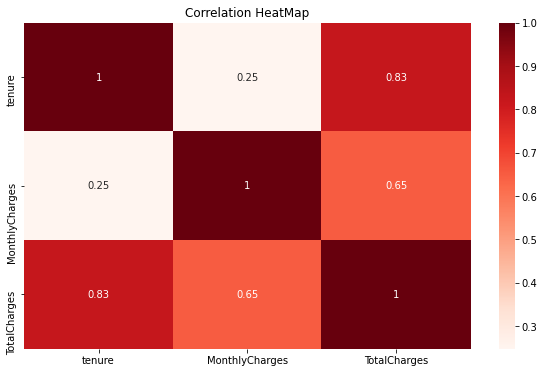

In [1890]:
plt.figure(figsize=(10,6))
sns.heatmap(df1[num_cols].corr(), annot=True, cmap='Reds')
plt.title('Correlation HeatMap');

## Analyze

* The correlation matrix shows that there is :
    * high correlation between 'tenure' and 'TotalCharges' (r2=0.83), that means they have an identical impact on target variable;
    * Low high correlation between 'MonthlyCharges' and TotalCharges(r2=0.65, they could have an identical impact on target variable);
    * Others features are not enough correlated;
    * We can drop TotalCharges from dataset;


In [1891]:
sel=["gender",	"SeniorCitizen",	"Partner",	"Dependents",	"tenure",	"PhoneService",	"MultipleLines",	"InternetService",	"OnlineSecurity",	"OnlineBackup",	"DeviceProtection",	"TechSupport",	"StreamingTV",	"StreamingMovies",	"Contract",	"PaperlessBilling",	"PaymentMethod",	"MonthlyCharges",	"Churn"]
telco=df1[sel]
#features_selected=telco.columns[-1]
telco=pd.get_dummies(telco)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [1905]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.420226
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7025
Method:                           MLE   Df Model:                           17
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.2737
Time:                        15:07:51   Log-Likelihood:                -2959.7
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender              -0.1191      0.063     -1.898      0.058      -0.242       0.004
SeniorCitiz

### Analyze
With a maximum pvalue <= 0.047, 14 features have been selected with a 95% level of confience.

features_selected :
  * SeniorCitizen
  * Dependents
  * tenure
  * PhoneService
  * InternetService
  * OnlineSecurity
  * OnlineBackup
  * DeviceProtection
  * TechSupport
  * Contract
  * PaperlessBilling
  * PaymentMethod
  * MonthlyCharges
  * Churn

In [1907]:
#features_selected=telcom.columns[-1]
features_selected = ["SeniorCitizen",	"Dependents",	"tenure",	"PhoneService",	"InternetService",	"OnlineSecurity",	"OnlineBackup",	"DeviceProtection",	"TechSupport",	"Contract",	"PaperlessBilling",	"PaymentMethod",	"MonthlyCharges",	"Churn"]
telco=telco[features_selected]
X = telco.drop('Churn', axis=1)
#y = df['Churn']
#X = telco[features_selected]
y = telco['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=49)
lr  = LogisticRegression()

In [1908]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1909]:
lr.score(X_test,y_test)

0.807382867960246

In [1910]:
y_pred = lr.predict(X_test)

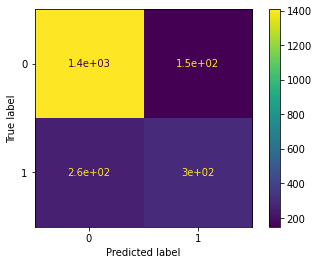

In [1911]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,y_test)

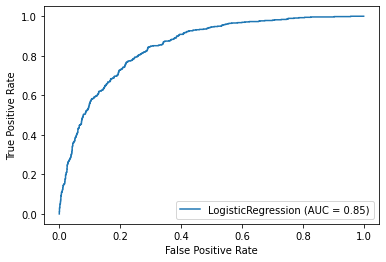

In [1912]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test)

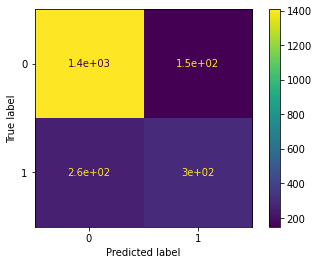

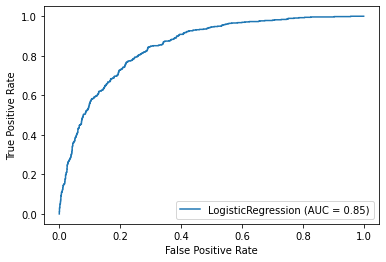

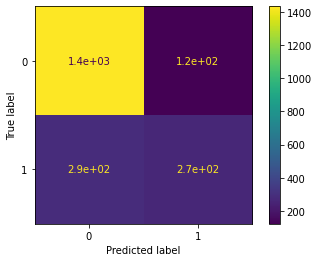

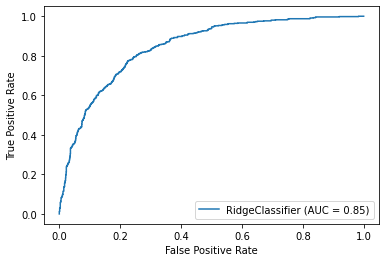

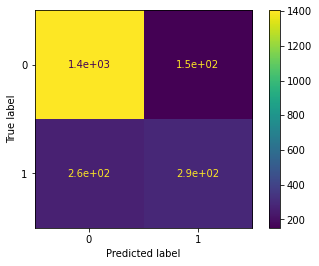

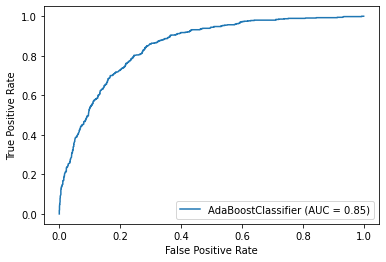

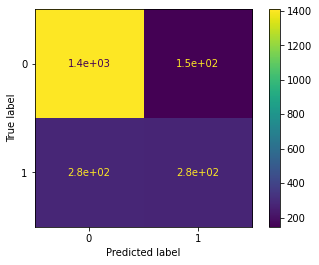

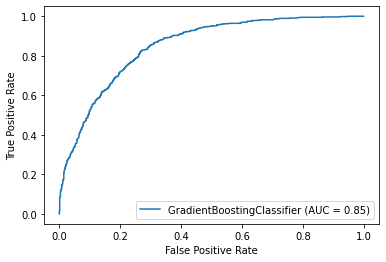

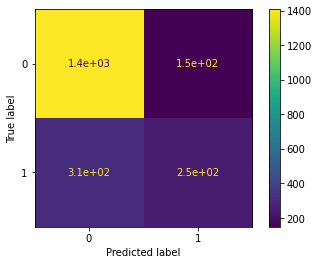

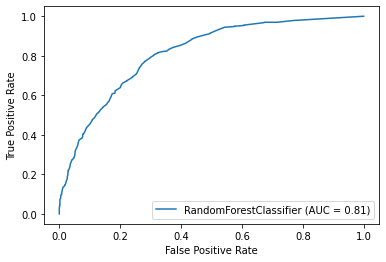

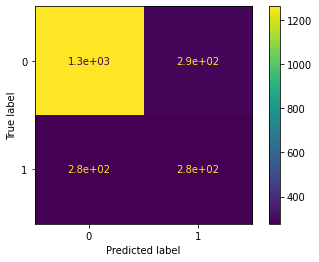

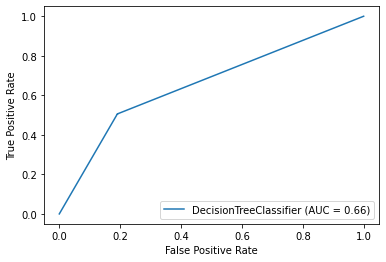

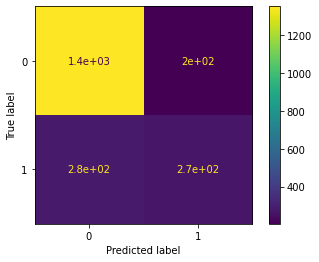

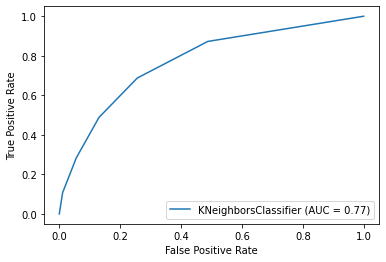

In [1913]:
import time 
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

telcom = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [1914]:
telcom

,names,scores,times
0,LogisticRegression,0.81,0.14
1,RidgeClassifier,0.81,0.01
2,AdaBoostClassifier,0.80,0.25
3,GradientBoostingClassifier,0.80,0.50
4,RandomForestClassifier,0.78,0.50
5,DecisionTreeClassifier,0.73,0.02
6,KNeighborsClassifier,0.77,0.01


In [1900]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1556
           1       0.68      0.54      0.60       557

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



## 1.5. Are any services especially helpful in retaining customers

#D. CONCLUSION

### IMPACT OF CHURN CUSTOMER ON BUSINESS